# **DOGS vs CATS PREDICTION WITH ~99.7% ACCURACY ON TEST SET AND ~98.5% ACCURACY ON VALIDATION SET**

**IMPORTING LIBRARIES**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator, image_dataset_from_directory

**Some files of the database were corrupt so, checking on the corrupt files**

In [4]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../input/microsoft-catsvsdogs-dataset/PetImages").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


../input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg
../input/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg


In [5]:
import warnings
warnings.filterwarnings('ignore')

**The below function will look for the corrupt file and will throw error for the file recieved**

In [6]:
import os
from PIL import Image
folder_path = r'../input/microsoft-catsvsdogs-dataset/PetImages'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

UnidentifiedImageError: cannot identify image file '../input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg'

In [15]:
from PIL import Image

img = Image.open('../input/microsoft-catsvsdogs-dataset/PetImages/Dog/100.jpg')
img.show()

display: unable to open X server `' @ error/display.c/DisplayImageCommand/411.


All the work on about 900MB of data is been done on the Kaggle Notebook. To delete corrupt file, we need to move our all original dataset from Input to working directory as there is no option to change original dataset on the Input original path.

**SHIFTING INPUT FILES TO WORKING AS THERE ARE 2 USELESS FILES WHICH CANT BE REMOVED**

In [16]:
!cp -r ../input/microsoft-catsvsdogs-dataset/PetImages ./

**CHECKING FOR NON .jpg FILES and REMOVING THEM**

In [17]:
ends = []

for content in ('Cat', 'Dog'):
    path = os.path.join('./PetImages/', content)
    print(path)
    print(len(os.listdir(path)))
    for file in os.listdir(path):
        dot = file.index('.')
        end = file[dot+1:]
        if end != 'jpg':
            if ends.count(end) == 0:
                ends.append(end)
            fpath = path + '/' + file
            os.remove(fpath)
                
set(ends)

./PetImages/Cat
12501
./PetImages/Dog
12501


{'db'}

**Removing the corrup files that we got in the original dataset file**
Since same dataset is copied, the corrupt files will be same

In [19]:
to_skip = ['./PetImages/Dog/11702.jpg', './PetImages/Cat/666.jpg', './PetImages/Dog/3982.jpg']

for lnks in to_skip:
    os.remove(lnks)

**Checking for corrupt files after cleaning the corrupt files, we found none**

In [ ]:
import os
from PIL import Image
folder_path = r'./PetImages'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

## **Division of dataset to Traing and Validation set without Augmentation**

In [21]:
train_df = image_dataset_from_directory(
    directory='./PetImages',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.1,
    subset='training',
    seed=45
)

val_df = image_dataset_from_directory(
    directory='./PetImages',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.1,
    subset='validation',
    seed=45
)

Found 24997 files belonging to 2 classes.
Using 22498 files for training.


2022-04-07 20:33:33.262058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 20:33:33.348433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 20:33:33.349236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 20:33:33.351704: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 24997 files belonging to 2 classes.
Using 2499 files for validation.


## Plotting the images

2022-04-07 20:33:36.631220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 224, 224, 3)
tf.Tensor([0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0], shape=(32,), dtype=int32)


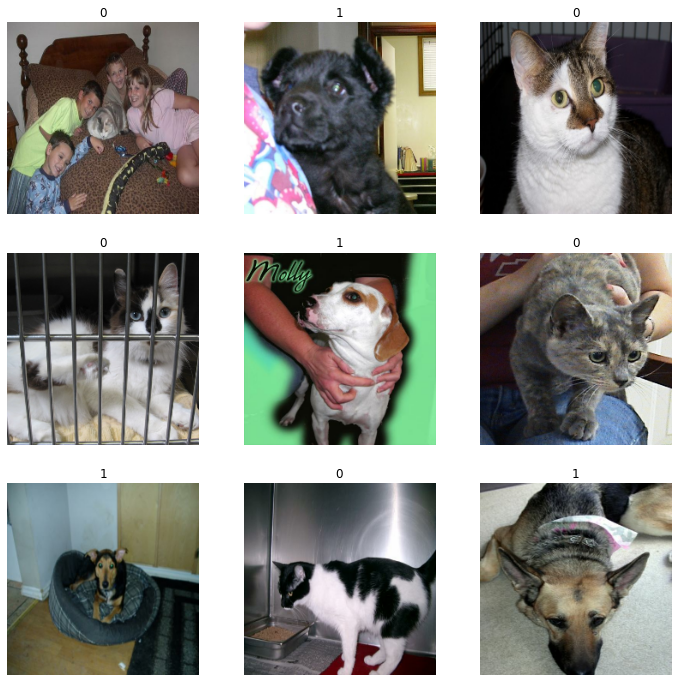

In [22]:
plt.figure(figsize=(12, 12))
num_rows = 3
num_cols = 3

for imgs, labels in train_df.take(1):
    print(imgs.shape)
    print(labels)
    for i in range(9):
        s = plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(imgs[i].numpy().astype('uint8'))
        plt.title(int(labels[i]))
        plt.axis('off')

## **Data Augmentation with division of dataset to Train and Validation Set**

In [23]:
MAIN_PATH = './PetImages'

CLASSES = os.listdir(MAIN_PATH)
NUM_CLASSES = 2
HEIGHT,WIDTH = 224, 224
BATCH_SIZE = 32
SPLIT = 0.2


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=SPLIT)

train_ds = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "training",
    class_mode = "categorical",
    shuffle = True
)

val_ds = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "validation",
    class_mode = "categorical",
    shuffle = True
)

Found 19999 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


# **MODEL WITH TRANSFER LEARNING**

**IMPORTING TRAINED LIBRARIES**

In [24]:
from keras.applications.densenet import DenseNet201
from keras.applications.vgg16 import VGG16

## **Using DenseNet with include_top=False**

In [25]:
dnsnet = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

74850304/74836368 [==============================] - 0s 0us/step


**Adding last layers to the DenseNet Model**

In [26]:
for layer in dnsnet.layers:
    layer.trainable=False


x = tf.keras.layers.Flatten()(dnsnet.output)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(50, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model1 = tf.keras.models.Model(inputs=dnsnet.input, outputs=preds)

**Callback function making sure to save the best model and take care of hyperparameters like learning rate and Early Stopping**

In [27]:
def create_callbacks():
    
    cpk_path = './best_model.h5'
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1,
    )

    reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        mode='max',
        factor=0.1,
        patience=3,
        verbose=0
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        mode='max',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint, reducelr, earlystop]         
    
    return callbacks

# |**Compiling, Training and prediction**

In [28]:
model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=1e-4),
    metrics=['accuracy']
)

callbacks = create_callbacks()

model1.fit(train_ds, epochs=15, validation_data=val_ds, callbacks=callbacks)

preds = model1.predict(val_ds)
preds = np.argmax(preds)

print((preds == val_ds.labels).sum())
print(len(val_ds.labels))
print(model1.evaluate(val_ds))

Epoch 1/15


2022-04-07 20:34:13.224559: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


625/625 [==============================] - 339s 517ms/step - loss: 0.0617 - accuracy: 0.9785 - val_loss: 0.0502 - val_accuracy: 0.9824

Epoch 00001: val_accuracy improved from -inf to 0.98239, saving model to ./best_model.h5
Epoch 2/15
625/625 [==============================] - 316s 506ms/step - loss: 0.0332 - accuracy: 0.9879 - val_loss: 0.0826 - val_accuracy: 0.9744

Epoch 00002: val_accuracy did not improve from 0.98239
Epoch 3/15
625/625 [==============================] - 315s 503ms/step - loss: 0.0303 - accuracy: 0.9894 - val_loss: 0.0680 - val_accuracy: 0.9816

Epoch 00003: val_accuracy did not improve from 0.98239
Epoch 4/15
625/625 [==============================] - 313s 502ms/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.0491 - val_accuracy: 0.9818

Epoch 00004: val_accuracy did not improve from 0.98239
Epoch 5/15
625/625 [==============================] - 316s 506ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0472 - val_accuracy: 0.9848

Epoch 00005: val_accur

In [29]:
model1.save('densenet_best_model.h5')

## Saving, Loading and Evaluating the model

In [31]:
new_model = tf.keras.models.load_model('best_model.h5')
new_model2 = tf.keras.models.load_model('densenet_best_model.h5')

new_model.evaluate(val_ds)
new_model2.evaluate(val_ds)

157/157 [==============================] - 67s 408ms/step - loss: 0.0529 - accuracy: 0.9846


[0.052883218973875046, 0.9845938086509705]

## **Trying prediction on new examples, images taken randomly from the internet and updated here**

In [40]:
images = os.listdir('../input/catdogsforCheck')
images

['d2.jpg',
 'd8.jpg',
 'c7.jpg',
 'c4.jpg',
 'd5.jpg',
 'd1.jpg',
 'c3.jpg',
 'c1.jpg',
 'd7.jpg',
 'd9.jpg',
 'd4.jpg',
 'c2.jpg',
 'd10.jpg',
 'd3.jpg',
 'c5.jpg',
 'c8.jpg',
 'd6.jpg',
 'c9.jpg',
 'c6.jpg',
 'c10.jpg']

In [41]:
val_ds.target_size

(224, 224)

### **Prediction and saving in the DataFrame format, with comparison and accuracy**

In [59]:
from keras.applications.densenet import preprocess_input
prediction_table = []

for i in range(len(images)):
    actual_label = images[i][:1]
    img = Image.open('../input/catdogsforCheck/' + str(images[i]))
    img = img.resize(val_ds.target_size)
    img = np.array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    
    prediction = np.argmax(new_model.predict(x), axis=1)
    data = {'Image': i, 'ActualLabel': actual_label, 'Prediction': prediction[0]}
    prediction_table.append(data)
    
prediction_table = pd.DataFrame(prediction_table)
# prediction_table.columns = ['Image', 'AcutalLabel', 'Prediction']
prediction_table

,Image,ActualLabel,Prediction
0,0,d,1
1,1,d,1
2,2,c,1
3,3,c,0
4,4,d,1
5,5,d,1
6,6,c,0
7,7,c,0
8,8,d,1
9,9,d,1


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

prediction_table.ActualLabel = le.fit_transform(prediction_table.ActualLabel)

# (prediction_table.ActualLabel == prediction_table.Prediction).sum()
prediction_table

,Image,ActualLabel,Prediction
0,0,1,1
1,1,1,1
2,2,0,1
3,3,0,0
4,4,1,1
5,5,1,1
6,6,0,0
7,7,0,0
8,8,1,1
9,9,1,1


In [65]:
print('Matched Prediction: ',(prediction_table.ActualLabel == prediction_table.Prediction).sum())
print('Total Count: ', len(prediction_table))

print(f'Accuracy: {(prediction_table.ActualLabel == prediction_table.Prediction).sum()/len(prediction_table)*100} %')

Matched Prediction:  19
Total Count:  20
Accuracy: 95.0 %


In [32]:
plt.plot(h['loss'], label='training_loss')
plt.plot(h['val_loss'], label='validation_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

NameError: name 'h' is not defined

In [ ]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable=False
    
x = tf.keras.layers.Flatten()(vgg.output)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model2 = tf.keras.models.Model(inputs=vgg.inputs, outputs=preds)
model2.summary()

In [ ]:
model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

f = model2.fit(train_ds, epochs=15, validation_data=val_ds)

preds = model2.predict(val_ds)
preds = np.argmax(preds)

print((preds == val_ds.labels).sum())
print(len(val_ds.labels))
print(model2.evaluate(val_ds))